## Setup

NOTE: All dependencies are within a conda environment to ensure reproducibility. To install all dependencies: pip install -r requirements.txt

In [1]:
import tensorflow.compat.v1 as tf
#Lets see if tensorflow finds the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import tensorflow as tf

2023-04-05 15:30:03.445216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 15:30:03.483342: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


2023-04-05 15:30:04.303030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 15:30:04.316485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 15:30:04.316597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#Lets see if it works
tf.ones(1) + tf.ones(1)

2023-04-05 15:30:04.319756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 15:30:04.320410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 15:30:04.320514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 15:30:04.320583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [3]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import time # for time-related functions
import random # for random number generation
import cv2 # for computer vision and image processing tasks
import datetime # for saving date and time information


import h5py # for working with HDF5 (Hierarchical Data Format) files
import boto3 # for working with Amazon Web Services (AWS)
from pynwb import NWBHDF5IO # for working with Neurodata Without Border (NWB) files
import fsspec 
from fsspec.implementations.cached import CachingFileSystem # library used for working with various file systems in Python.
import requests 
import aiohttp # libraries which are used for making HTTP requests in Python.
import os # OS module provides various operating system-related functions to the code
import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle



# used for splitting data into training and testing sets in Python.
from sklearn.model_selection import train_test_split 

# for generating a confusion matrix
from sklearn.metrics import confusion_matrix


# Classes and functions from the Keras library which is used for building and training deep learning models in Python.
from keras.models import load_model
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# which is a high-level neural networks API used for building and training deep learning models in Python.
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## [Ignore for now] Define hyperparameters

In [4]:
# IMG_SIZE = 224
# BATCH_SIZE = 64
# EPOCHS = 10

# MAX_SEQ_LENGTH = 20
# NUM_FEATURES = 2048

In [5]:
# import sys
# sys.path.append("/Users/konstantinoskalaitzidis/Developer/dmc")
# from readSessionsServer import SessionIterator

#TODO: Script to retrieve videos from a list of calcium videos (of the same animal) from the db

## Dataset preparation and label annotation (feature engineering)

### [Ignore for now] Data availale for processing - overview

The following is not going to be used for now but will allow us to have an overview of all the videos I have available to train my CNN model. I expect to have all recordings sessions for each animal as input for the CNN which is going to be trained only based on recordings from the corresponding animal. The data will be split to train/test at some point...

In [6]:
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

# print(f"Total videos for training: {len(train_df)}")
# print(f"Total videos for testing: {len(test_df)}")

# train_df.sample(10)

Extract frames from the calcium imaging video and save to directory. Each frame contains spatial information, and the sequence of those frames contains temporal information (the latter is not exploited for now). Maybe also ask for path input from the user to make it reproducible for others.

Helpful source: https://keras.io/examples/vision/video_classification/

The number of frames may differ from video to video.
The frame rate may also differ from video to video but it should be 20fps for all. 

The duration of each frame depends on the frame rate of the video. If a video has a frame rate of 25 fps, then each frame will have a duration of 1/25th of a second, or approximately 0.04 seconds. The calcium videos use 20fps, while the behavioral recordings are at 60fps. Alignment of these videos will follow shortly. 

### [Ignore for now] Fetch all calcium videos from the dmc database and align calcium videos with behavior annotations

In [7]:
# mySession = readSessionServer.SessionIterator()
# for sess in mySession.findSessions():
#     print(sess)
    # if sess.hasBehavior() and sess.hasCalcium():
        # behavior = sess.getBehaviorSegmentation(align_with_calcium=True).reset_index()

### [Ignore for now] Open calcium video locally, create dir for saving frames and count number of frames with OpenCV

In [8]:
# Open the HDF5 file
# with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb', 'r') as f:
#     # Print the keys of the file
#     print(list(f.keys()))
#     # dataset = f['identifier'][()]
#     # print(dataset)

In [9]:
# Directory where frames from video will be stored after extraction
# frames_dir = "path"

In [10]:
# Open the video using OpenCV and count the number of frames
# cap = cv2.VideoCapture(raw_calcium_video_path)
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# cap.release()

# print(f"Number of frames in the video: {frame_count}")

In [11]:
# video = 'path'

# cap = cv2.VideoCapture(video)
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# cap.release()

# print(f"Number of frames in the video: {frame_count}")

In [12]:
# Open the video file
# cap = cv2.VideoCapture(video)

# # Get the frame rate of the video
# frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# # Release the video capture object
# cap.release()

# print(f"Frame rate of the video: {frame_rate}")

In [13]:
# save each frame as one image

In [14]:
# cap = cv2.VideoCapture(video)

# # Loop through the video frames and save each one as an image file
# frame_count = 0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == False:
#         break
#     # Save the frame as an image file
#     frame_file = os.path.join(frames_dir, "frame_" + str(frame_count) + ".jpg")
#     cv2.imwrite(frame_file, frame)
#     frame_count += 1

# # Close the video file
# cap.release()

## [Start here] Align behavior annotation with calcium video frames

At some point I will also have to align the behavior and the calcium imaging videos and use those as input for my CNN model

### [Start here] Loading calcium video

In [15]:
s3_calcium_url = 'https://s3.ki.se/dmc-striatum-arrowmaze/processed-data/miniscope-recordings/export-to-nwb/animal3learnday11/20211028_181307_animal3learnday11.nwb?AWSAccessKeyId=5AMYRX4EUZ0MV0276K24&Signature=s9dQEfdUne%2BMT5BH43ljJ8XfhL8%3D&Expires=1680696486'

In [16]:
# Animal and learning day:
animal_no = 3
learning_day = 11
video_name = 'animal_'+str(animal_no)+'_learning_day_'+str(learning_day)
video_name

'animal_3_learning_day_11'

In [17]:
start_time = time.time()


fs = CachingFileSystem(
    fs=fsspec.filesystem("http"),
    cache_storage="nwb-cache",  # Local folder for the cache
)

with fs.open(s3_calcium_url, "rb") as f:
    with h5py.File(f) as file:
        video_data = np.array(file["analysis/recording_20211028_181307-PP-BP-MC/data"])
        

end_time = time.time()
execution_time = end_time - start_time
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)

print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Execution time: 0 hours, 0 minutes, 3 seconds


In [18]:
video_data[:3]

array([[[175, 181, 182, ..., 181, 181, 180],
        [170, 174, 173, ..., 177, 176, 179],
        [175, 175, 168, ..., 180, 176, 178],
        ...,
        [180, 182, 175, ..., 170, 173, 167],
        [177, 188, 181, ..., 177, 179, 180],
        [184, 184, 183, ..., 188, 182, 174]],

       [[183, 185, 178, ..., 176, 175, 180],
        [178, 175, 177, ..., 177, 180, 181],
        [186, 178, 178, ..., 178, 180, 183],
        ...,
        [179, 180, 177, ..., 170, 173, 174],
        [177, 179, 180, ..., 179, 174, 173],
        [177, 186, 185, ..., 186, 180, 178]],

       [[179, 181, 180, ..., 182, 184, 179],
        [177, 176, 181, ..., 176, 172, 173],
        [177, 181, 185, ..., 169, 172, 175],
        ...,
        [185, 187, 184, ..., 174, 171, 172],
        [187, 191, 187, ..., 179, 176, 171],
        [188, 184, 184, ..., 185, 182, 175]]], dtype=int16)

In [19]:
# Determine the size of the calcium video dataset
num_of_frames = video_data.shape[0]
img_height = video_data.shape[1]
img_width = video_data.shape[2]
print("The number of video frames is ", num_of_frames, " and the frame dimensions (height x width) are: ", img_height, "X", img_width)

The number of video frames is  24589  and the frame dimensions (height x width) are:  393 X 444


### Subtract the frame with the minimum pixel values from all other frames

In [20]:
# # Find the frame with the minimum pixel values
# min_frame = min(video_data, axis=(1, 2)

# # Subtract the minimum frame from the rest of the frames
# video_data = video_data - video_data[min_frame]
                

# Find the index of the frame with the minimum pixel values
# min_frame_index = np.argmin(np.sum(video_data, axis=(1, 2)))

# # Subtract the minimum frame from all other frames in the array
# video_data = video_data - video_data[min_frame_index]


### Normalize pixel values in calcium video

In [21]:
# Normalize pixel values to be between 0 and 1
max_pixel_value = video_data.max()
min_pixel_value = video_data.min()
range_pixel_value = max_pixel_value - min_pixel_value
normalized_video_data = (video_data - min_pixel_value) / range_pixel_value
video_data = normalized_video_data

# Verify the normalization by checking the minimum and maximum values
print('Minimum pixel value: {:.3f}' .format(np.min(video_data)))
print('Maximum pixel value:', np.max(video_data))

Minimum pixel value: 0.000
Maximum pixel value: 1.0


### Loading bonsai data

In [22]:
# Preparing bonsai data file.
# CSV with additional data from the behavior box, such as reward deliveries. Also includes information needed for synchronizing the calcium and behavioral recordings.
bonsai_data_path = '/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/data/tmaze_2021-10-28T18_13_23.csv'
bonsai_data = pd.read_csv(bonsai_data_path, header=None)


# Adding column names
bonsai_data = bonsai_data.rename(columns={
    0: 'Time', 1: 'Trial_Number',
    2: 'Reward', 3: 'Frame_Number', 4: 'Central_Zone',
    5: 'L_Zone', 6: 'R_Zone', 7: 'Calcium_frame'})

bonsai_data.head()

,Time,Trial_Number,Reward,Frame_Number,Central_Zone,L_Zone,R_Zone,Calcium_frame
0,2021-10-28T18:13:25.3758464+02:00,0,0,66,False,False,False,0
1,2021-10-28T18:13:25.3759488+02:00,0,0,66,False,False,False,0
2,2021-10-28T18:13:25.3759872+02:00,0,0,66,False,False,False,0
3,2021-10-28T18:13:25.3851136+02:00,0,0,67,False,False,False,0
4,2021-10-28T18:13:25.4012672+02:00,0,0,68,False,False,False,0


### Loading behavior segmentation file

In [23]:
# Segmentation of each frame into one behavior class.
df_behavior_path = '/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/data/20211028_181307_animal3learnday11.h5'
df_behavior = pd.read_hdf(df_behavior_path, 'per_frame')
df_behavior.head()

,frame_no,segment_no,state_id,spatial_progress,temporal_progress,state_name
0,0,0,14,-0.906529,0.00,leftReturn
1,1,0,14,-0.910748,0.02,leftReturn
2,2,0,14,-0.916558,0.04,leftReturn
3,3,0,14,-0.925125,0.06,leftReturn
4,4,0,14,-0.931319,0.08,leftReturn


### Aligning calcium frame column from the bonsai file with the behavior file

In [24]:
df_aligned = df_behavior.loc[bonsai_data.groupby('Calcium_frame').first()[1:].Frame_Number].reset_index()
df_aligned.head()

,index,frame_no,segment_no,state_id,spatial_progress,temporal_progress,state_name
0,704,704,11,0,0.389899,0.389899,initReward
1,707,707,11,0,0.395960,0.395960,initReward
2,710,710,11,0,0.402020,0.402020,initReward
3,713,713,11,0,0.408081,0.408081,initReward
4,716,716,11,0,0.414141,0.414141,initReward


### Redoing behavior labels

In [25]:
df_aligned['state_name'].unique()

array(['initReward', 'initRight', 'mainRunLeft', 'turnMainToLeft',
       'leftRun', 'leftReward', 'leftRight', 'leftReturn',
       'turnLeftToMain', 'mainReturn', 'initLeft', 'leftLeft', 'rightRun',
       'rightReward', 'rightRight', 'rightReturn', 'turnRightToMain',
       'mainOther', 'rightLeft', 'leftOther', 'turnMainToRight',
       'rightOther', 'turnLeftToRight', 'turnRightToLeft', 'mainRunRight'],
      dtype=object)

In [26]:
df_new_annotations = df_aligned

In [27]:
df_new_annotations[['state_id', 'state_name']]
df_unique_states = df_new_annotations[['state_id', 'state_name']].drop_duplicates(subset='state_id')
df_unique_states = df_unique_states.set_index('state_id')['state_name']
df_unique_states = df_unique_states.sort_index()
df_unique_states

state_id
0          initReward
1            initLeft
2           initRight
3         mainRunLeft
4        mainRunRight
5          mainReturn
6           mainOther
7      turnMainToLeft
8     turnMainToRight
9      turnLeftToMain
10    turnRightToMain
11    turnLeftToRight
12    turnRightToLeft
13            leftRun
14         leftReturn
15         leftReward
16           leftLeft
17          leftRight
18          leftOther
19           rightRun
20        rightReturn
21        rightReward
22          rightLeft
23         rightRight
24         rightOther
Name: state_name, dtype: object

In [28]:
# main: initReward, initLeft, initRight, mainRunLeft, mainRunRight, mainReturn, mainOther, turnMainToLeft, turnMainToRight
# left: turnLeftToMain, turnLeftToRight, leftRun, leftReturn, leftReward, leftLeft, leftRight, leftOther
# right: turnRightToMain, turnRightToLeft, rightRun, rightReturn, rightReward, rightLeft, rightRight, rightOther 

In [29]:
df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({1: 0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({9:1, 11:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1})
df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({10:2, 12:2, 19:2, 20:2, 21:2, 22:2, 23:2, 24:2})
# df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({1: 0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
# df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({9:1, 11:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1})
# df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({10:2, 12:2, 19:2, 20:2, 21:2, 22:2, 23:2, 24:2})
# df_new_annotations['state_id'] = df_new_annotations['state_id'].replace({25:3})

In [30]:
df_new_annotations_unique = df_new_annotations['state_id'].unique()

### Verify the data

In [31]:
# For each calcium video frame, I want to give the state_id value annotation. 
train_images = video_data
train_labels = df_new_annotations['state_id']
#train_labels = df_aligned['state_id']

In [32]:
#train_labels = train_labels.values

In [1]:
# Let's plot 5 random images from the training set and display the class name below each image:

plt.figure(figsize=(10,10))
random_indices = random.sample(range(len(train_images)), 5) # randomly select 5 indices from the dataset
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_indices[i]])
    plt.xlabel(train_labels[random_indices[i]])
    plt.imshow(train_images[random_indices[i]], cmap=plt.cm.binary, vmin=0, vmax=1)
plt.show()
# Plot the first 5 images
# plt.figure(figsize=(10,10))
# for i in range(5):
#     plt.subplot(1, 5, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(video_data[i])
# plt.show()


NameError: name 'plt' is not defined

We have 24186 images of dimensions 349x374 and the number 1 demonstrates that images are grayscale.

In [34]:
channel_dimension = 1

train_images = video_data.reshape(num_of_frames, img_height, img_width, channel_dimension)
#train_labels = df_behavior['state_id']

# ensuring that the pixel values are float numbers. This is a common preprocessing step for image data
train_images = train_images.astype('float32')

### Finding number of classes and converting labels to categorical values

# How many distinct behaviors do we have?
no_of_behaviors = df_new_annotations_unique

# Define the number of classes
num_classes = len(no_of_behaviors)



# Converting labels to categorical.
train_labels = to_categorical(train_labels, num_classes)

In [35]:
num_classes

3

In [36]:
train_labels.shape

(24589, 3)

In [37]:
no_of_behaviors

array([0, 1, 2])

In [38]:
train_images.shape

(24589, 393, 444, 1)

In [39]:
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [40]:
# check class imbalance
# count the number of instances of each class
class_counts = pd.value_counts(df_new_annotations['state_id'])
# print the counts of each class
print(class_counts)

0    11336
1     9643
2     3610
Name: state_id, dtype: int64


In [41]:
total_counts = class_counts[0] + class_counts[1] + class_counts[2]
total_counts

24589

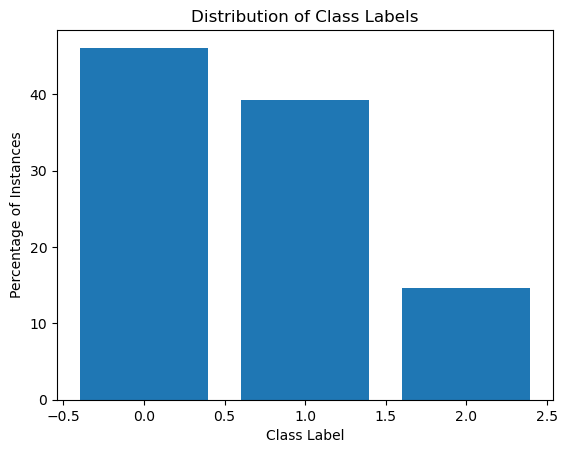

Behavior Main is 46.1%
Behavior Left is 39.2%
Behavior Right is 14.7%


In [42]:
# calculate the percentage of each class in the dataset
class_percents = pd.value_counts(df_new_annotations['state_id'], normalize=True) * 100

# create a bar chart of class percentages
plt.bar(class_percents.index, class_percents.values)

# add axis labels and a title
plt.xlabel('Class Label')
plt.ylabel('Percentage of Instances')
plt.title('Distribution of Class Labels')

# display the plot
plt.show()

print("Behavior Main is {:.1f}%" .format((class_counts[0]/total_counts)*100))
print("Behavior Left is {:.1f}%" .format((class_counts[1]/total_counts)*100))
print("Behavior Right is {:.1f}%" .format((class_counts[2]/total_counts)*100))

# print("Behavior Main is {:.1f}%" .format((class_counts[0]/total_counts)*100))
# print("Behavior Left is {:.1f}%" .format((class_counts[1]/total_counts)*100))
# print("Behavior Right is {:.1f}%" .format((class_counts[2]/total_counts)*100))
# print("Behavior Other is {:.1f}%" .format((class_counts[3]/total_counts)*100))


## Build the model

## Train the model

In [43]:
# Input channel dimension (Greyscale: 1, RGB: 3)
#channel_dimension = 1
#channel_dimension = int(input("Input channel dimension (Greyscale: 1, RGB: 3)"))
#Improve in case the user clicks smth else

In [44]:
# Define and compile your CNN model here
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train your model here
# model.fit(train_images, train_labels, epochs=10, batch_size=32)


In [45]:
# training parameters
epochs = 10
batch_size = 32
channel_dimension = 1

In [46]:
def construct_model(input_shape, num_classes, name):
    
    # Creating a sequential model. A sequential model is a linear stack of layers, where the output of one layer is the input of the next.
    model = Sequential(name=name)

    # Add a convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation function. 
    # The ReLU activation function is a simple equation that takes the input of a neuron and returns the input if it is positive, and returns 0 if it is negative.
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) # input is a 28x28 image with 1 color channel.

    # Add a max pooling layer with a pool size of 2x
    
    # This layer applies a max operation over a 2x2 window of the input, reducing the spatial dimensions of the input by half.
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a convolutional layer with 64 filters, a kernel size of 3x3, and a ReLU activation function
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

    # Add a max pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output from the previous layers
    model.add(Flatten())

    # Add a dropout layer to prevent overfitting
    model.add(Dropout(0.5))

    # Add a fully connected layer with 128 units and a ReLU activation function. This layer has 128 neurons and it is fully connected to the previous layer
    model.add(Dense(128, activation='relu'))

    # Add a final output layer with num_classes number of units and a softmax activation function The softmax function is used to convert the output of the final layer into probability distribution over 10 possible classes.
    model.add(Dense(num_classes, activation='softmax'))

    # # Complete model 
    # model.summary()
    
    return model

In [47]:
input_shape = (img_height, img_width, channel_dimension)
# input_shape = (batch_size, img_height, img_width, channel_dimension)

In [48]:
# Create the model by calling the function
name = 'BPNN_v1'
model = construct_model(input_shape, num_classes, name)

In [49]:
# plot model architecture
#plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [50]:
# import visualkeras
# from PIL import ImageFont
# visualkeras.layered_view(model, legend=True)

# from ann_visualizer.visualize import ann_viz
# plot = ann_viz(model, view=True, filename=str(name)+"-architecture", title="CNN — "+str(name)+" — Simple Architecture")

In [51]:
# Create an early stopping callback with a higher patience value (e.g. 10 epochs)
# early_stopping = EarlyStopping(monitor='loss', patience=100)

In [52]:
def model_execution():
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(), metrics=['accuracy'])
    
    start_time = time.time()

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size) # add early stopping here
    
    model.save('BPNN_V1_model.h5')

    end_time = time.time()
    execution_time = end_time - start_time
    hours, remainder = divmod(execution_time, 3600)
    minutes, seconds = divmod(remainder, 60)

    print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")
    
    return history

In [53]:
#Define and compile your CNN model here


In [54]:
history = model_execution()

Epoch 1/10


2023-04-05 15:30:33.305517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-04-05 15:30:34.221458: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


769/769 [==============================] - 30s 35ms/step - loss: 1.0375 - accuracy: 0.4504
Epoch 2/10
769/769 [==============================] - 27s 35ms/step - loss: 0.9921 - accuracy: 0.4621
Epoch 3/10
769/769 [==============================] - 27s 34ms/step - loss: 0.9662 - accuracy: 0.4840
Epoch 4/10
769/769 [==============================] - 27s 34ms/step - loss: 0.9221 - accuracy: 0.5250
Epoch 5/10
769/769 [==============================] - 27s 34ms/step - loss: 0.8688 - accuracy: 0.5709
Epoch 6/10
769/769 [==============================] - 26s 34ms/step - loss: 0.8338 - accuracy: 0.5973
Epoch 7/10
769/769 [==============================] - 27s 34ms/step - loss: 0.8064 - accuracy: 0.6152
Epoch 8/10
769/769 [==============================] - 26s 34ms/step - loss: 0.7776 - accuracy: 0.6315
Epoch 9/10
769/769 [==============================] - 26s 34ms/step - loss: 0.7542 - accuracy: 0.6474
Epoch 10/10
769/769 [==============================] - 26s 34ms/step - loss: 0.7278 - accurac

In [55]:
# Save the history object to a pickle file
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [56]:
def save_training_info():
    # Set the model name
    model_name = model.name
    
    # Get the current date and time
    now = datetime.datetime.now()
    date_time = now.strftime("%Y-%m-%d %H:%M:%S")

    # Save the history object to a CSV file
    with open(str(name)+'-training_history.csv', 'a', newline='') as f:
        writer = csv.writer(f)

        # Write header row if file is empty
        if f.tell() == 0:
            writer.writerow(['Model', 'Epoch', 'Train Loss', 'Train Acc', 'Date/Time', 'Video Name','Comment'])

        # Write data for each epoch
        for i, (tl, ta) in enumerate(zip(history.history['loss'], history.history['accuracy'])):
            writer.writerow([model_name, i+1, tl, ta, date_time, video_name, 'without frame subtraction'])
        writer.writerow(['', '', '', '', '', '', ''])

In [57]:
save_training_info()

In [58]:
# save train_images and train_labels
with open('train_images.pkl', 'wb') as f:
    pickle.dump(train_images, f)

In [59]:
with open('train_labels.pkl', 'wb') as f:
    pickle.dump(train_labels, f)

In [60]:
# plot the accuracy and loss of the model during training. (validation later)
# def plot_accuracy():
#     plt.plot(history.history['accuracy'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train'], loc='upper left')
#     plt.savefig('accuracy.png')
#     return plt.show()

# def plot_loss():
#     plt.plot(history.history['loss'])
#     plt.title('Model loss')
#     plt.ylabel('loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train'], loc='upper left')
#     plt.savefig('loss.png')
#     return plt.show()

In [61]:
# plot_accuracy()
# plot_loss()

High bias: If the training accuracy is low, it suggests that the model is underfitting the training data, i.e., it is not complex enough to capture the patterns in the data. In this case, you may need to increase the model's complexity by adding more layers or neurons, or by using a more complex architecture.

High variance: If the training accuracy is high but the validation accuracy is low, it suggests that the model is overfitting the training data, i.e., it is memorizing the training data instead of generalizing to new data. In this case, you may need to use regularization techniques like dropout or L2 regularization, or use early stopping to prevent the model from overfitting.

Good fit: If the training accuracy and validation accuracy are both high and close to each other, it suggests that the model is neither underfitting nor overfitting the data, i.e., it is generalizing well to new data.

Plateauing: If the validation accuracy is no longer increasing as the training set size or epochs increase, it suggests that the model has reached its capacity and adding more data or epochs is unlikely to improve its performance.

In general, a model accuracy curve can help you diagnose issues with your model and guide you in selecting appropriate strategies to improve its performance. It can also give you an idea of how much training data or how many epochs you need to achieve good performance.

### Confussion matrix

In [62]:
# model = load_model('BPNN_V1_model.h5')

# predicted_labels = np.argmax(model.predict(train_images), axis=1)
# confusion = confusion_matrix(train_labels, predicted_labels)

# # Plot the confusion matrix
# fig, ax = plt.subplots(figsize=(10,10))
# im = ax.imshow(confusion, cmap=plt.cm.Blues)
# ax.set_xticks(np.arange(len(no_of_behaviors)))
# ax.set_yticks(np.arange(len(no_of_behaviors)))
# ax.set_xticklabels(no_of_behaviors)
# ax.set_yticklabels(no_of_behaviors)
# ax.tick_params(axis='x', rotation=90)
# ax.set_xlabel('Predicted label')
# ax.set_ylabel('True label')
# ax.set_title('Confusion matrix')
# fig.colorbar(im)
# plt.show()

# model = load_model('BPNN_V1_model.h5')

# predicted_labels = np.argmax(model.predict(train_images), axis=1)

# # Compute the confusion matrix using the predicted class labels and the true class labels
# confusion = confusion_matrix(train_labels, predicted_labels)

# # Plot the confusion matrix
# fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(confusion)
# ax.set_xticks(np.arange(len(num_classes)))
# ax.set_yticks(np.arange(len(num_classes)))
# ax.set_xticklabels(num_classes)
# ax.set_yticklabels(num_classes)
# ax.set_xlabel('Predicted')
# ax.set_ylabel

In [63]:
#assert len(np.unique(train_labels)) == len(no_of_behaviors), "Number of classes does not match length of class names"

### Reflect on the results

1. Insufficient data? One calcium video of 24186 frames and with 349x374 dimensions.
2. Model architecture not appropriate. Try increasing the number of layers or filters, or adding more complex layers like BatchNormalization, Dropout, or Conv2DTranspose.
3. Incorrect data preprocessing
4. Incorrect hyperparameters
5. Class Imbalance (do oversampling, or undersampling)

### [Ignore for now]

In [64]:
# from keras.layers import BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator

# model = Sequential()

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel_dimension)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # reshape train_images to have 4 dimensions
# train_images = np.expand_dims(train_images, axis=-1)

# # Reshape train_images to have 4 dimensions
# #train_images = np.squeeze(train_images)
# # train_images = np.squeeze(train_images, axis=-1)
# # train_images = np.squeeze(train_images, axis=-1)
# # train_images = np.squeeze(train_images, axis=-1)
# # train_images = np.expand_dims(train_images, axis=-1)


# # Data augmentation
# train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
#                                    shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

# history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=batch_size),
#                     epochs=epochs,
#                     steps_per_epoch=len(train_images) // batch_size,
#                     shuffle=True)

In [65]:
# Reusable snippets

In [66]:
# Load calcium video from local environment
# with h5py.File('path', 'r') as f:
#     video_data = np.array(f['analysis/recording_20211016_163921-PP-BP-MC/data'])

In [67]:
# Loading locally
# with h5py.File('/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.h5', 'r') as f:
#     print(list(f.keys()))
#     behavior_data = np.array(f['per_frame'])

In [68]:
# # save the model architecture to a JSON file
# with open('model_architecture.json', 'w') as f:
#     f.write(model.to_json())

In [69]:
# # load the model architecture from the JSON file
# with open('model_architecture.json', 'r') as f:
#     json_string = f.read()

# model_json = model_from_json(json_string)

# # print the loaded model summary
# model.summary()

In [70]:
# mySession = readSessionServer.SessionIterator()
# sess = mySession.findSession()
# # for sess in mySession.findSessions():
# #     print(sess)
# if sess.hasBehavior() and sess.hasCalcium():
#     behavior = sess.getBehaviorSegmentation(align_with_calcium=True).reset_index()

In [71]:
# # define paths
# video_path = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/20211016_163921_animal1learnday1.nwb'
# train_dir = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/train'
# test_dir = '/Users/konstantinoskalaitzidis/Developer/dmc/thesis_data/test'

# # define train-test split ratio
# train_test_ratio = 0.8

# # open video file
# cap = cv2.VideoCapture(video_path)

# # get video frame count
# frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# # create list of frame indices
# frame_indices = list(range(frame_count))

# # shuffle frame indices
# random.shuffle(frame_indices)

# # split frame indices into train and test sets
# train_frame_indices = frame_indices[:int(frame_count * train_test_ratio)]
# test_frame_indices = frame_indices[int(frame_count * train_test_ratio):]

# # iterate over frames and save to train or test directory
# for i in range(frame_count):
#     # read frame
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     # save frame to train or test directory
#     if i in train_frame_indices:
#         cv2.imwrite(os.path.join(train_dir, f'{i}.jpg'), frame)
#     else:
#         cv2.imwrite(os.path.join(test_dir, f'{i}.jpg'), frame)